# Coursera Capstone Project

# Importing the Libraries 

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Dataset : This dataset is about past loans.

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-09-28 17:37:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-09-28 17:37:25 (12.5 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


# Data Preprocessing 

## Naming the columns which are unnamed

In [4]:
df.rename(columns={"Unnamed: 0":"ID1"},inplace=True)
df.rename(columns={"Unnamed: 0.1":"ID2"},inplace=True)

In [5]:
df.head()

,ID1,ID2,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


## As there are 2 similar ID columns , we drop one of them 

In [6]:
data=df.drop(['ID2'],axis=1)

In [7]:
data.head()

,ID1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


# Checking the null values

In [8]:
data.isnull().sum()

ID1               0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

# Checking the data types

In [9]:
data.dtypes

ID1                int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

## As duse_date and effective_date is in object datatype, converting it to data and time

In [10]:
data['due_date'] = pd.to_datetime(data['due_date'])
data['effective_date'] = pd.to_datetime(data['effective_date'])
data.dtypes

ID1                        int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

In [11]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

# Data Visualizing

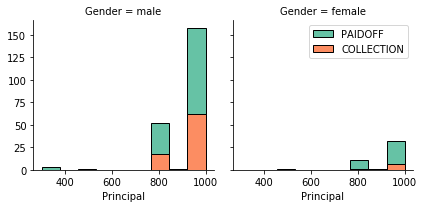

In [12]:
import seaborn as sns

# By Principal

bins = np.linspace(data.Principal.min(), data.Principal.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

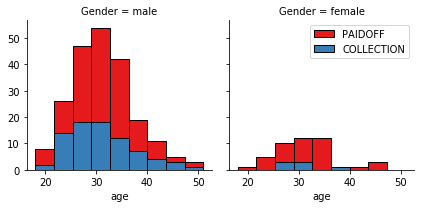

In [13]:
# By age

bins = np.linspace(data.age.min(), data.age.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [15]:
data.columns

Index(['ID1', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'age', 'education', 'Gender', 'dayofweek'],
      dtype='object')

# checking the skewness of the data and its features

In [16]:
data.columns

Index(['ID1', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'age', 'education', 'Gender', 'dayofweek'],
      dtype='object')

In [17]:
data.head()

,ID1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


## Converting categorical features to numerical features

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['loan_status'] = le.fit_transform(data['loan_status'])
data['education'] = le.fit_transform(data['education'])
data['Gender'] = le.fit_transform(data['Gender'])

In [19]:
data.head()

,ID1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,1,1000,30,2016-09-08,2016-10-07,45,1,1,3
1,2,1,1000,30,2016-09-08,2016-10-07,33,0,0,3
2,3,1,1000,15,2016-09-08,2016-09-22,27,3,1,3
3,4,1,1000,30,2016-09-09,2016-10-08,28,3,0,4
4,6,1,1000,30,2016-09-09,2016-10-08,29,3,1,4


# Feature Selection 

In [106]:
X = data[['Principal','terms','age','Gender','dayofweek']]
Y = data.loan_status

#  Here we want to predict the load status(Yes/No) , hence we use classification algorithmns:

In [107]:
## Importing Libraries

In [108]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

# Spliting the Data into train and test

In [133]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.30,random_state=0)

# Applying Standard Scaler to bring the data points into one unit

In [136]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

xtrain = sc.fit_transform(xtrain)

xtest = sc.transform(xtest)

In [137]:
# importing warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# K Nearest Neighbor(KNN)

In [116]:
k_range = range(1, 26)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    ypredict = knn.predict(xtest)
    scores.append(accuracy_score(ytest, ypredict))

print(scores)

accuracy = pd.DataFrame(scores)

print(accuracy.mean()*100)

[0.7884615384615384, 0.625, 0.7115384615384616, 0.6538461538461539, 0.7884615384615384, 0.7307692307692307, 0.7596153846153846, 0.7307692307692307, 0.7788461538461539, 0.7307692307692307, 0.7115384615384616, 0.7307692307692307, 0.7307692307692307, 0.7307692307692307, 0.7403846153846154, 0.7307692307692307, 0.75, 0.7307692307692307, 0.7884615384615384, 0.7980769230769231, 0.8076923076923077, 0.7596153846153846, 0.7596153846153846, 0.7211538461538461, 0.7211538461538461]
0    74.038462
dtype: float64


# Random Forest

In [141]:
model3 = RandomForestClassifier(criterion='gini')

model3.fit(xtrain,ytrain)

predict=model3.predict(xtest)

model3.score(xtest,ytest)

0.7307692307692307

# Decision Tree Classifier

In [145]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(xtrain,ytrain)

Tree = Tree.predict(xtest)

from sklearn.metrics import accuracy_score

print("DecisionTrees's Accuracy: ", accuracy_score(ytest, Tree))

DecisionTrees's Accuracy:  0.7884615384615384


# Support Vector Machine

In [139]:
model2 = SVC()

model2.fit(xtrain,ytrain)


predict=model2.predict(xtest)

model2.score(xtest,ytest)

0.75

# Logistic Regression

In [131]:
model1 = LogisticRegression(solver='warn',random_state=None)

model1.fit(xtrain,ytrain)

ypredict = model1.predict(xtest)

model1.score(xtest,ytest)

0.8269230769230769

In [83]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [123]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-09-28 18:49:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-09-28 18:49:32 (391 MB/s) - ‘loan_test.csv’ saved [3642/3642]



# Loading Test set for evaluation 

In [125]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [147]:
from sklearn.metrics import f1_score
f1_score(ytest, ypredict, average='weighted')
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(ytest, ypredict)

0.8269230769230769